# Feelings classification exercise

## Dataset

This data set consists of 25,000 movie reviews from IMDB (Internet Movie Database), labeled by sentiment (positive/negative). It is a binary classification problem with the difference that in this case the entry data is text.



## Load and visualize dataset

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


The num_words argument indicates that we will only take into account the 10,000 most frequent words in the data set. Therefore, the rest of the words that are infrequent will be discarded and will not be part of the reviews with which we will train and test the algorithm.

Both train_data and test_data correspond to a list of reviews. Each of the reviews corresponds to a list of integers that represent the index of a word. To know what index each word has, we can call the get_word_index() method

In [3]:
word_index = imdb.get_word_index()
word_index

# for example, 'seriously': 612 ; it's the 612th most frequent word

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
# First review of the train data
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


It is important to keep in mind that when viewing the reviews we must apply an offset of -3 because the number 0, 1 and 2 are reserved for "padding", "start of sequence" and "unknown" respectively.

In [5]:
reversed_word_index = {v: k for k, v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, "({})".format(i)) for i in train_data[0]])

# In this exampe we see that the unfrequent words are substituted by 0,1,2 and directly don't appear on the text. The othe rnumbers are substituted by the correspondent word from the list.

"(1) this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert (2) is an amazing actor and now the same being director (2) father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for (2) and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also (2) to the two little boy's that played the (2) of norman and paul they were just brilliant children are often left out of the (2) list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

The variables train_labels and test_labels correspond to a list of values ​​that can be 1, if the review is positive, or 0, if the review is negative

In [6]:
# This is a positive review
print(train_labels[0])

1


## Data preprocessing



Although we have already coded the reviews so that they are represented by numerical values ​​instead of text strings, there are some factors that do not allow them to be appropriate data sets to provide to an artificial neural network.

One of the fundamental limitations is that each review has a different number of words.



In [7]:
import numpy as np

# Vectorize reviews
def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

In [8]:
# this is what the vectorize function does, it puts a 1 in the position of the number
a = np.zeros(15)
print("Array original:\t\t", a)
a[[0, 3, 5, 7, 9]] = 1.
print("Array modificado:\t", a)

Array original:		 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Array modificado:	 [1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)

In [10]:
print("Original values:\t", train_data[0][:15])
print("Vectorized values:\t", X_train[0][:15])

Original values:	 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]
Vectorized values:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]


## Dataset splitting

In [11]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, test_labels, test_size=0.5)

In [12]:
Y_train = train_labels

In [13]:
print("Length train set: ", len(X_train))
print("Length validation set: ", len(X_val))
print("Length test set: ", len(X_test))

Length train set:  25000
Length validation set:  12500
Length test set:  12500


## ANN construction

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid')) # it's a binary class, we need a sigmoid function in the last layer

In [15]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), # we decrease the learning rate to prevent having peaks due to convergion issues (the default is 0.01)
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [16]:
history = model.fit(
    X_train,
    Y_train,
    epochs=40,
    validation_data=(X_val, Y_val))

Epoch 1/40
782/782 [==============================] - 6s 6ms/step - loss: 0.6734 - accuracy: 0.6147 - precision: 0.6454 - val_loss: 0.6566 - val_accuracy: 0.6832 - val_precision: 0.7121
Epoch 2/40
782/782 [==============================] - 7s 9ms/step - loss: 0.6347 - accuracy: 0.7356 - precision: 0.7484 - val_loss: 0.6199 - val_accuracy: 0.7511 - val_precision: 0.7687
Epoch 3/40
782/782 [==============================] - 4s 5ms/step - loss: 0.5960 - accuracy: 0.7798 - precision: 0.7830 - val_loss: 0.5821 - val_accuracy: 0.7799 - val_precision: 0.7698
Epoch 4/40
782/782 [==============================] - 4s 6ms/step - loss: 0.5562 - accuracy: 0.8006 - precision: 0.7957 - val_loss: 0.5438 - val_accuracy: 0.7970 - val_precision: 0.7956
Epoch 5/40
782/782 [==============================] - 5s 7ms/step - loss: 0.5170 - accuracy: 0.8125 - precision: 0.8051 - val_loss: 0.5074 - val_accuracy: 0.8083 - val_precision: 0.7995
Epoch 6/40
782/782 [==============================] - 4s 5ms/step - lo

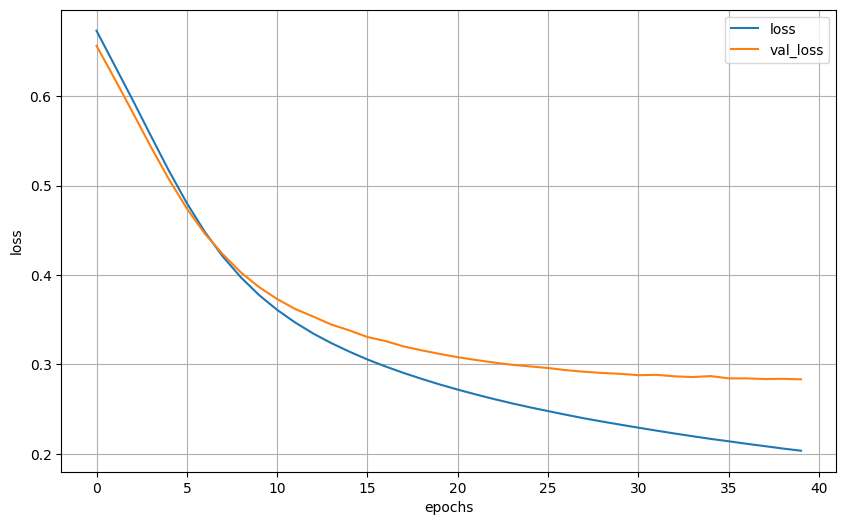

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

From the graph above we can see a bit of overfitting (the error of the train set keeps getting lower while the error from the validation stabilizes and seems to be raising in any time).

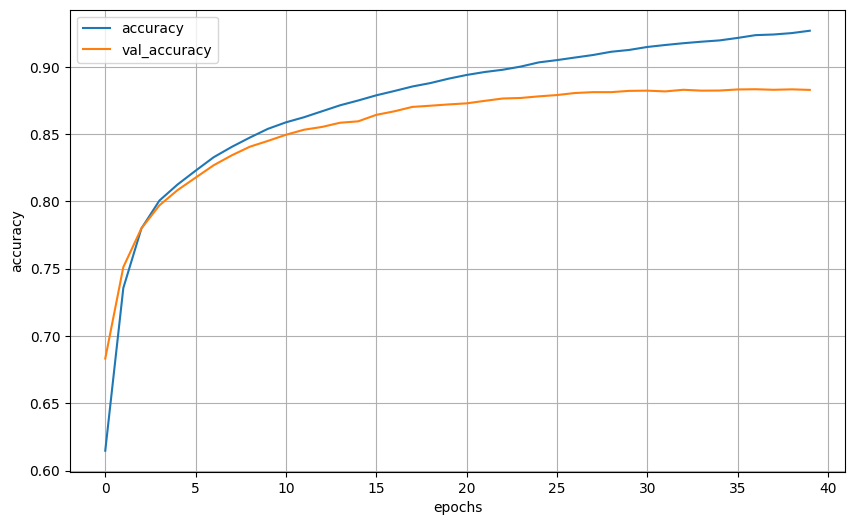

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

The two graphs from above don't seem to have peaks or noise, therefore we can say the learning rate is good chosen.

### Evaluation with test set

In [19]:
test_loss, test_acc, test_prec = model.evaluate(X_test, Y_test)

391/391 [==============================] - 2s 6ms/step - loss: 0.2858 - accuracy: 0.8839 - precision: 0.8828


In [20]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.8839200139045715
test_prec: 0.882841169834137


## Trying other preprocessing of the data

In [21]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [22]:
word_index = imdb.get_word_index()

In [23]:
reversed_word_index = {v: k for k, v in word_index.items()}

" ".join([reversed_word_index.get(i - 3, "({})".format(i)) for i in train_data[0]])

"(1) this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert (2) is an amazing actor and now the same being director (2) father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for (2) and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also (2) to the two little boy's that played the (2) of norman and paul they were just brilliant children are often left out of the (2) list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

In [24]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

### Data preparation

In [25]:
X_train_prep = []
X_test_prep = []

In [26]:
for review in train_data:
    X_train_prep.append(
        " ".join([reversed_word_index.get(i - 3, "") for i in review]))

In [27]:
X_train_prep[0]

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [28]:
for review in test_data:
    X_test_prep.append(
        " ".join([reversed_word_index.get(i - 3, "") for i in review]))

In [30]:
X_test_prep[0]

" please give this one a miss br br   and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite  so all you madison fans give this a miss"

In [31]:
Y_train = train_labels
Y_test = test_labels

Comment: The ideal is to apply the division of the data set before performing any preprocessing so that no type of trend is inferred as a consequence of the transformation.

In [32]:
from sklearn.model_selection import train_test_split

X_test_prep, X_val_prep, Y_test, Y_val = train_test_split(X_test_prep, Y_test, test_size=0.5)

In [34]:
# vectorization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_prep)

In [43]:
# X_train = X_train.toarray()

In [42]:
import pandas as pd

pd.DataFrame(X_train, columns=[vectorizer.get_feature_names_out()])

,00,000,10,100,1000,101,11,12,13,13th,...,zhang,zizek,zodiac,zombi,zombie,zombies,zone,zoom,zorro,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_test = vectorizer.transform(X_test_prep)
X_test = X_test.toarray()

In [44]:
X_val = vectorizer.transform(X_val_prep)
X_val = X_val.toarray()

### ANN training

In [45]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.SGD(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [47]:
history = model.fit(
    X_train,
    Y_train,
    epochs=10,
    validation_data=(X_val, Y_val))

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.6816 - accuracy: 0.5577 - precision: 0.5530 - val_loss: 0.6645 - val_accuracy: 0.6210 - val_precision: 0.6588
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.6412 - accuracy: 0.6548 - precision: 0.6614 - val_loss: 0.6269 - val_accuracy: 0.6793 - val_precision: 0.6813
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.6086 - accuracy: 0.6990 - precision: 0.7063 - val_loss: 0.5974 - val_accuracy: 0.7126 - val_precision: 0.7268
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.5789 - accuracy: 0.7320 - precision: 0.7340 - val_loss: 0.5698 - val_accuracy: 0.7390 - val_precision: 0.7359
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.5525 - accuracy: 0.7568 - precision: 0.7537 - val_loss: 0.5473 - val_accuracy: 0.7558 - val_precision: 0.7379
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - lo

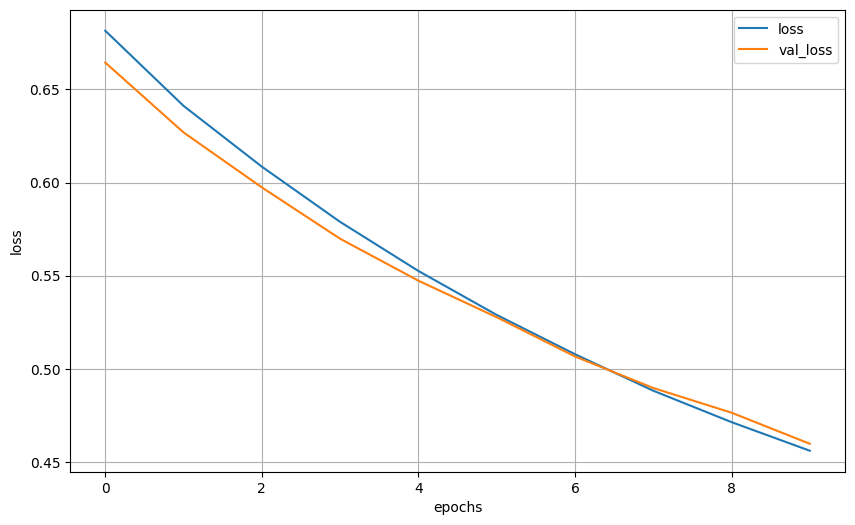

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

We can see no overfitting this time.

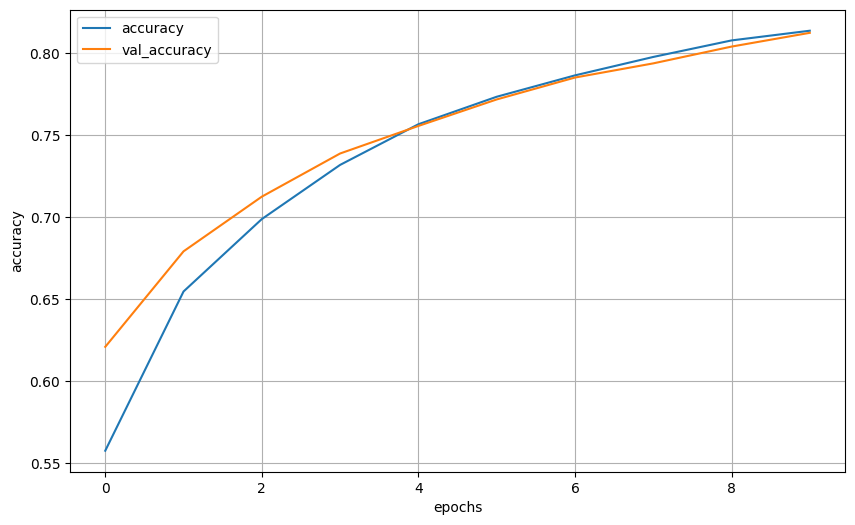

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [50]:
test_loss, test_acc, test_prec = model.evaluate(X_test, Y_test)

391/391 [==============================] - 2s 5ms/step - loss: 0.4583 - accuracy: 0.8067 - precision: 0.7979


In [51]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.8067200183868408
test_prec: 0.7979258298873901
